In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats.stats import pearsonr
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [42]:
#Import csv
df = pd.read_csv('bol_sales.csv')
df.head()

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol
0,person_1,female,7065,4.6,30,105,117,1232
1,person_2,female,23028,9.8,23,81,70,1396
2,person_3,female,103377,9.2,11,38,94,1240
3,person_4,female,9815,3.2,16,54,124,720
4,person_5,female,22646,10.1,21,78,119,1379


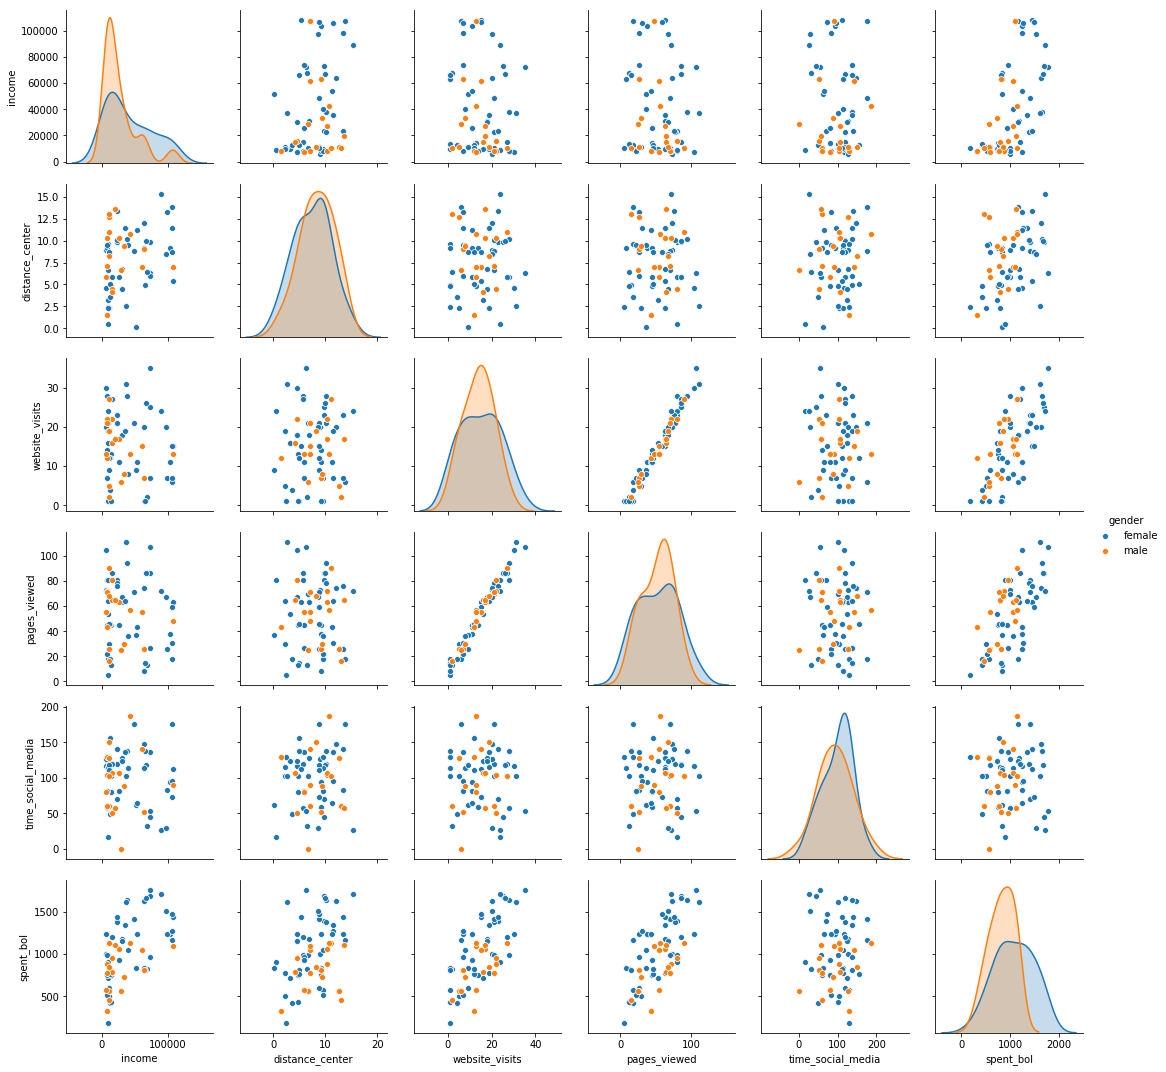

In [43]:
sns.pairplot(df, hue = "gender")
plt.show()

In [45]:
dummies = pd.get_dummies(df['gender'])
dummies.head()

,female,male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [46]:
df = pd.concat([df, dummies], axis=1) #the axis=1 means: add it to the columns (axis=2 is rows)
df.head(1)

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol,female,male
0,person_1,female,7065,4.6,30,105,117,1232,1,0


In [47]:
df_subset = df[["spent_bol", "income"]]
df_subset.head(2)

,spent_bol,income
0,1232,7065
1,1396,23028


In [48]:
df['spent_bol_log'] = df['spent_bol'].apply(math.log10)
df['income_log'] = df['income'].apply(math.log10)
df.head(2)

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol,female,male,spent_bol_log,income_log
0,person_1,female,7065,4.6,30,105,117,1232,1,0,3.090611,3.849112
1,person_2,female,23028,9.8,23,81,70,1396,1,0,3.144885,4.362256


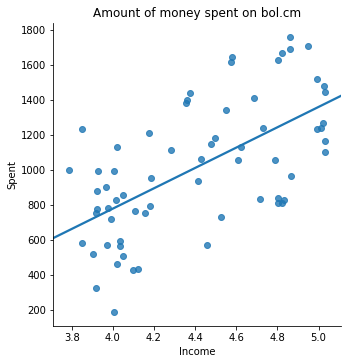

In [54]:
sns.lmplot(x='income_log', y='spent_bol', ci=False, data=df)
plt.xlabel('Income') #use matplotlib to refine Seaborn plot
plt.ylabel('Spent')
plt.title('Amount of money spent on bol.cm')
plt.show()

In [55]:
x = df[["income_log"]] 
y = df["spent_bol"]
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

In [56]:
df['spent_bol_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(10)

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol,female,male,spent_bol_log,income_log,spent_bol_log_p,spent_bol_p
0,person_1,female,7065,4.6,30,105,117,1232,1,0,3.090611,3.849112,2.815922,689.941426
1,person_2,female,23028,9.8,23,81,70,1396,1,0,3.144885,4.362256,2.958033,987.892291
2,person_3,female,103377,9.2,11,38,94,1240,1,0,3.093422,5.014424,3.138646,1366.565549
3,person_4,female,9815,3.2,16,54,124,720,1,0,2.857332,3.991890,2.855463,772.843818
4,person_5,female,22646,10.1,21,78,119,1379,1,0,3.139564,4.354992,2.956021,983.674120
5,person_6,female,6142,8.9,20,73,126,1000,1,0,3.000000,3.788310,2.799083,654.637277
6,person_7,female,63833,12.0,20,74,148,1625,1,0,3.210853,4.805045,3.080660,1244.992367
7,person_8,female,10139,6.6,21,70,102,991,1,0,2.996074,4.005995,2.859369,781.033610
8,person_9,female,8452,5.8,28,81,58,990,1,0,2.995635,3.926959,2.837481,735.142528
9,person_10,male,15367,4.5,22,81,51,954,0,1,2.979548,4.186589,2.909383,885.893305


In [57]:
#Name y(dependent) and X(independent).
y = df["spent_bol"]
#X = df_subset.loc[:,'area':'year_built']
X = df[["income_log"]]#, "female", "male"]]

#split the data in training and test set and store in different variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.head()

,income_log
10,4.580743
59,4.411973
19,4.494572
34,4.523811
63,3.850646


In [58]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data.
math.sqrt(mean_squared_error(y_test, y_test_p))

253.3602997037913

In [61]:
#Import csv
df2 = pd.read_csv("bol_sales_holdout.csv")
df2.head()

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media
0,person_67,male,10813,4.8,10,41,107
1,person_68,male,56724,13.2,12,52,0
2,person_69,male,11476,9.0,2,16,120
3,person_70,male,37781,11.4,15,56,134
4,person_71,male,26179,9.4,14,50,92


In [64]:
df2['income_log'] = df2['income'].apply(math.log10)
x_holdout = df2[["income_log"]] 
#y_holdout = df2["spent_bol"]
#lm = LinearRegression() #this creates a new LR model
#lm.fit(x, y) #this "fits" the model

#b0 = lm.intercept_ #gets the intercept
#b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

#X_holdout = df2[['']]

df2['spent_bol_p'] = lm.predict(x_holdout) #use built-in predict() method to generate predictions; store in original dataframe
df2.head(10)

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,income_log,spent_bol_p
0,person_67,male,10813,4.8,10,41,107,4.033946,797.263065
1,person_68,male,56724,13.2,12,52,0,4.753767,1215.218183
2,person_69,male,11476,9.0,2,16,120,4.059791,812.269265
3,person_70,male,37781,11.4,15,56,134,4.577273,1112.739433
4,person_71,male,26179,9.4,14,50,92,4.417953,1020.231980
5,person_72,female,96452,2.9,17,52,87,4.984311,1349.080983
6,person_73,female,9952,3.2,3,20,118,3.997910,776.339295
7,person_74,female,7857,6.0,11,37,109,3.895257,716.734720
8,person_75,male,11600,4.2,14,49,69,4.064458,814.979363
9,person_76,female,46561,7.0,15,56,64,4.668022,1165.431651


In [70]:
#Import csv
df3 = pd.read_csv("bol_sales_holdout_answers.csv", sep = ';')
df3.head()

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol
0,person_67,male,10813,"4,8",10,41,107,470
1,person_68,male,56724,"13,2",12,52,0,1219
2,person_69,male,11476,9,2,16,120,360
3,person_70,male,37781,"11,4",15,56,134,1091
4,person_71,male,26179,"9,4",14,50,92,879


In [72]:
df3["spent_bol_p"] = df2["spent_bol_p"]
df3.head()

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol,spent_bol_p
0,person_67,male,10813,"4,8",10,41,107,470,797.263065
1,person_68,male,56724,"13,2",12,52,0,1219,1215.218183
2,person_69,male,11476,9,2,16,120,360,812.269265
3,person_70,male,37781,"11,4",15,56,134,1091,1112.739433
4,person_71,male,26179,"9,4",14,50,92,879,1020.231980


In [77]:
math.sqrt(mean_squared_error(df["spent_bol"], df["spent_bol_p"]))

294.2797388780291

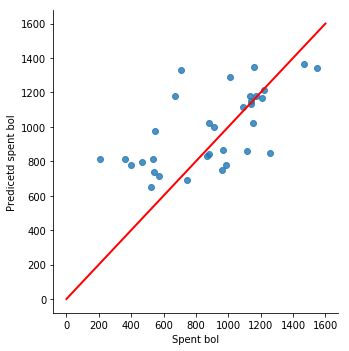

In [80]:
sns.lmplot(x='spent_bol', y='spent_bol_p', fit_reg=False, data=df3)
plt.xlabel('Spent bol')
plt.ylabel('Predicetd spent bol')
plt.plot([0, 1600], [0, 1600], color='red', lw=2) #Plot a diagonal length
#plt.title('Amount of money spent on bol.cm')
plt.show()